In [106]:
import lightgbm as gbm
from colorthief import ColorThief
import colorsys
from PIL import Image
import matplotlib.pyplot as plt 
import pandas as pd

In [80]:
gbm=gbm.Booster(model_file='./model.txt')

(-0.5, 249.5, 49.5, -0.5)

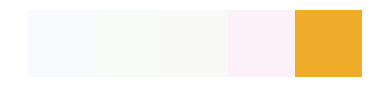

In [119]:
# param: palette,eg:[(r,g,b),(r,g,b),(r,g,b),(r,g,b),(r,g,b)]
# return style ['cute','fresh','technology']
def style_predict(palette):
    def sortByLight2(elem):
        hls=colorsys.rgb_to_hls(*elem)
        return hls[1]
    # build a color palette
    palette.sort(key=sortByLight2,reverse=True)
    palette1=[*palette[0],*palette[1],*palette[2],*palette[3],*palette[4]]
    for c in palette:
        h,l,s=colorsys.rgb_to_hls(*c)
        palette1=[*palette1,h,l,s]
    x=pd.Series(palette1)
    y_pred = gbm.predict(x, num_iteration=gbm.best_iteration)
    pred_Y=[0 for i in range(len(y_pred))]
    y_pred=y_pred.tolist()
    style=['cute','fresh','technology']
    for i in range(len(y_pred)):
        pred_Y[i]=y_pred[i][:].index(max(y_pred[i][:]))
    print("Probability：",y_pred)
    return style[pred_Y[0]]